# Chapter 2

## 1. Create your own dataset for the quantified self by using your smartphone. You can create the dataset using measurement apps on your smartphone (e.g. at the time of writing Funf, SensorLog, phybox, or SensorKinetics) or other devices. Include repeated periods with different activities (please incorporate some we have seen in the crowdsignal data and some that are different) and study the variation you see in the sensory values. Be sure to include periods without any specific activities to study the background noise of the sensors. Log the intervals at which you performed the different activities.

### a. Plot and describe the data you obtain using the libraries provided with the book.

In [1]:

import pandas as pd
import numpy as np

In [2]:
boxing_data = pd.read_csv("./our_datasets/ch2_1_raw/boxing_data.csv")
crowd_signals = pd.read_csv("./datasets/crowdsignals/csv-participant-one/accelerometer_phone.csv")

In [3]:
crowd_signals.head()

,sensor_type,device_type,timestamps,x,y,z
0,accelerometer,smartphone,1454956105656222395,-0.087,0.181,9.621
1,accelerometer,smartphone,1454956105660105781,-0.069,0.153,9.663
2,accelerometer,smartphone,1454956105667091406,-0.073,0.156,9.647
3,accelerometer,smartphone,1454956105670696615,-0.070,0.184,9.623
4,accelerometer,smartphone,1454956105675807552,-0.059,0.171,9.625


In [4]:
boxing_data = boxing_data.rename(columns={"Time (s)":"timestamps", "Linear Acceleration x (m/s^2)": "x", "Linear Acceleration y (m/s^2)":"y", "Linear Acceleration z (m/s^2)": "z"})
boxing_data["sensor_type"] = "accelerometer"
boxing_data["device_type"] = "smartphone"
# boxing_data = boxing_data.drop(["Absolute acceleration (m/s^2)"], axis = 1)

In [5]:
from datetime import datetime

dt_obj = datetime.strptime('7.6.2022 09:00:00,76',
                           '%d.%m.%Y %H:%M:%S,%f')
millisec = int(dt_obj.timestamp() * 1000)

print(millisec)
print(1454956105656222395)

1654585200760
1454956105656222395


In [6]:
boxing_data.head()

,timestamps,x,y,z,Absolute acceleration (m/s^2),sensor_type,device_type
0,0.061874,-0.012595,0.234416,0.261410,0.351347,accelerometer,smartphone
1,0.066911,0.071366,0.244199,0.210297,0.330077,accelerometer,smartphone
2,0.071947,0.160429,0.196512,0.151078,0.295261,accelerometer,smartphone
3,0.076984,0.392639,0.234954,0.118217,0.472593,accelerometer,smartphone
4,0.082012,0.702538,0.352884,0.162493,0.802802,accelerometer,smartphone


In [7]:
pd.set_option('display.float_format', lambda x: '%.20f' % x)

In [8]:
boxing_data["timestamps"] = boxing_data["timestamps"] * 1000000000
boxing_data["timestamps"] = boxing_data["timestamps"] + millisec * 1000000


In [9]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [10]:
boxing_data.head()

,timestamps,x,y,z,Absolute acceleration (m/s^2),sensor_type,device_type
0,1654585200821874176.00000,-0.01259,0.23442,0.26141,0.35135,accelerometer,smartphone
1,1654585200826910720.00000,0.07137,0.24420,0.21030,0.33008,accelerometer,smartphone
2,1654585200831947264.00000,0.16043,0.19651,0.15108,0.29526,accelerometer,smartphone
3,1654585200836983552.00000,0.39264,0.23495,0.11822,0.47259,accelerometer,smartphone
4,1654585200842012416.00000,0.70254,0.35288,0.16249,0.80280,accelerometer,smartphone


In [11]:
boxing_data["x"] = boxing_data["x"].astype(float)
boxing_data["y"] = boxing_data["y"].astype(float)
boxing_data["z"] = boxing_data["z"].astype(float)

In [12]:
boxing_data.to_csv("./our_datasets/ch2_1/boxing_data_edited.csv", index=False)

Please wait, this will take a while to run!
Creating numerical datasets from files in our_datasets/ch2_1 using granularity 500.
Reading data from boxing_data_edited.csv
Figure saved to figures/figure_1.png
Figure saved to figures/figure_1.pdf


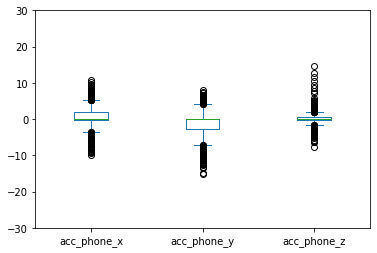

Figure saved to figures/figure_2.png
Figure saved to figures/figure_2.pdf


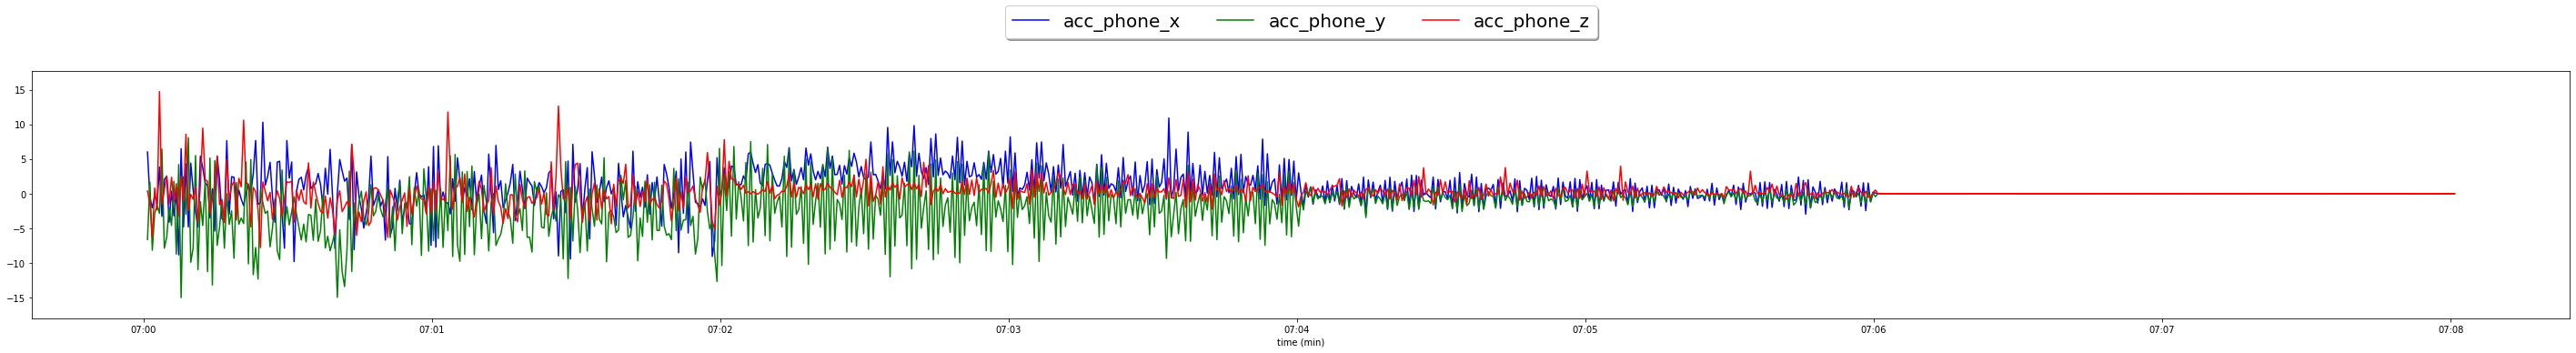

       acc_phone_x  acc_phone_y  acc_phone_z
count    961.00000    961.00000    961.00000
mean       0.72700     -1.42000      0.15600
std        2.64700      3.42000      1.73100
min       -9.82900    -15.02600     -7.80600
25%       -0.22400     -2.84500     -0.26200
50%        0.00200     -0.08200      0.00100
75%        2.03000      0.00200      0.65800
max       10.91200      8.08400     14.73000


IndexError: list index out of range

In [18]:
from Chapter2.CreateDataset import CreateDataset
from util.VisualizeDataset import VisualizeDataset
from util import util
import matplotlib.pyplot as plt
from pathlib import Path
import copy
import os
import sys

%matplotlib inline

DATASET_PATH = Path('./our_datasets/ch2_1/')
RESULT_PATH = Path('./our_datasets/ch2_1_results/')
RESULT_FNAME = 'chapter2_result.csv'

GRANULARITIES = [1000, 500]
[path.mkdir(exist_ok=True, parents=True) for path in [DATASET_PATH, RESULT_PATH]]

print('Please wait, this will take a while to run!')

datasets = []
for milliseconds_per_instance in GRANULARITIES:
    print(f'Creating numerical datasets from files in {DATASET_PATH} using granularity {milliseconds_per_instance}.')

    # Create an initial dataset object with the base directory for our data and a granularity
    dataset = CreateDataset(DATASET_PATH, milliseconds_per_instance)

    # Add the selected measurements to it.

    # We add the accelerometer data (continuous numerical measurements) of the phone and the smartwatch
    # and aggregate the values per timestep by averaging the values
    dataset.add_numerical_dataset('boxing_data_edited.csv', 'timestamps', ['x','y','z'], 'avg', 'acc_phone_')
    

    # We add the labels provided by the users. These are categorical events that might overlap. We add them
    # as binary attributes (i.e. add a one to the attribute representing the specific value for the label if it
    # occurs within an interval).
    # dataset.add_event_dataset('labels.csv', 'label_start', 'label_end', 'label', 'binary')

    # Get the resulting pandas data table
    dataset = dataset.data_table
    dataset = dataset.astype(float)
    # Plot the data
    DataViz = VisualizeDataset()
    # DataViz = VisualizeDataset('./our_datasets/ch2_1/')
    
    # Boxplot
    DataViz.plot_dataset_boxplot(dataset, ['acc_phone_x','acc_phone_y','acc_phone_z'])
    # plt.boxplot(dataset["acc_phone_x"])

    # Plot all data
    DataViz.plot_dataset(dataset, ['acc_'], ["like"], ["line"])

    # And print a summary of the dataset.
    util.print_statistics(dataset)
    datasets.append(copy.deepcopy(dataset))

    # If needed, we could save the various versions of the dataset we create in the loop with logical filenames:
    dataset.to_csv(RESULT_PATH / f'chapter2_result_{milliseconds_per_instance}')


# Make a table like the one shown in the book, comparing the two datasets produced.
util.print_latex_table_statistics_two_datasets(datasets[0], datasets[1])

# Finally, store the last dataset we generated (250 ms).
# dataset.to_csv(RESULT_PATH / RESULT_FNAME)

# Lastly, print a statement to know the code went through

print('The code has run through successfully!')



In [39]:
dataset

,acc_phone_x,acc_phone_y,acc_phone_z
2022-06-07 07:00:00.821874176,6.00471,-6.64208,0.37755
2022-06-07 07:00:01.321874176,-0.53655,1.66994,-1.41654
2022-06-07 07:00:01.821874176,-2.06595,-8.18120,-6.29875
2022-06-07 07:00:02.321874176,-0.26914,-2.84458,0.80935
2022-06-07 07:00:02.821874176,-1.47511,-1.68683,-2.36529
...,...,...,...
2022-06-07 07:07:58.821874176,0.00073,0.00080,0.00090
2022-06-07 07:07:59.321874176,0.00105,-0.00096,0.00127
2022-06-07 07:07:59.821874176,0.00193,-0.00202,0.00062
2022-06-07 07:08:00.321874176,-0.00122,-0.00043,-0.00005


# Extracting the walking/running dataset

In [66]:
import pandas as pd

their_data = pd.read_csv("./intermediate_datafiles/chapter2_result.csv")

In [67]:
their_data.columns

Index(['Unnamed: 0', 'acc_phone_x', 'acc_phone_y', 'acc_phone_z',
       'acc_watch_x', 'acc_watch_y', 'acc_watch_z', 'gyr_phone_x',
       'gyr_phone_y', 'gyr_phone_z', 'gyr_watch_x', 'gyr_watch_y',
       'gyr_watch_z', 'hr_watch_rate', 'labelOnTable', 'labelSitting',
       'labelWashingHands', 'labelWalking', 'labelStanding', 'labelDriving',
       'labelEating', 'labelRunning', 'light_phone_lux', 'mag_phone_x',
       'mag_phone_y', 'mag_phone_z', 'mag_watch_x', 'mag_watch_y',
       'mag_watch_z', 'press_phone_pressure'],
      dtype='object')

In [68]:
their_data.head()

,Unnamed: 0,acc_phone_x,acc_phone_y,acc_phone_z,acc_watch_x,acc_watch_y,acc_watch_z,gyr_phone_x,gyr_phone_y,gyr_phone_z,...,labelEating,labelRunning,light_phone_lux,mag_phone_x,mag_phone_y,mag_phone_z,mag_watch_x,mag_watch_y,mag_watch_z,press_phone_pressure
0,2016-02-08 18:28:25.656222395,-0.090431,0.164098,9.631765,9.550844,0.197689,1.513422,-0.008824,0.018529,-0.001647,...,0,0,NaN,-73.134000,-138.000000,-29.022000,-6.681818,59.000000,-23.318182,1029.041
1,2016-02-08 18:28:25.906222395,-0.097600,0.167640,9.631740,9.552667,0.189271,1.511000,-0.008800,0.018540,-0.001540,...,0,0,1084.0,-73.877500,-139.552500,-28.970000,-6.375000,59.000000,-23.708333,1029.132
2,2016-02-08 18:28:26.156222395,-0.089120,0.167520,9.637300,9.549745,0.194588,1.517431,-0.008880,0.018340,-0.002420,...,0,0,1084.0,-76.401600,-141.259200,-28.555200,-6.038462,58.076923,-25.538462,1029.282
3,2016-02-08 18:28:26.406222395,-0.090135,0.166019,9.632538,9.552022,0.200000,1.498267,-0.008962,0.018288,-0.002038,...,0,0,1086.0,-76.804615,-141.133846,-28.954615,-5.958333,58.291667,-24.125000,1029.369
4,2016-02-08 18:28:26.656222395,-0.090608,0.167686,9.630078,9.550375,0.200771,1.504312,-0.008760,0.018800,-0.002260,...,0,0,1084.0,-76.740000,-141.314400,-28.795200,-6.260870,59.260870,-23.478261,1029.268


In [69]:
their_data = their_data.drop([
       'acc_watch_x', 'acc_watch_y', 'acc_watch_z', 'gyr_phone_x',
       'gyr_phone_y', 'gyr_phone_z', 'gyr_watch_x', 'gyr_watch_y',
       'gyr_watch_z', 'hr_watch_rate', 'labelOnTable', 'labelSitting',
       'labelWashingHands', 'labelStanding', 'labelDriving',
       'labelEating', 'light_phone_lux', 'mag_phone_x',
       'mag_phone_y', 'mag_phone_z', 'mag_watch_x', 'mag_watch_y',
       'mag_watch_z', 'press_phone_pressure'], axis=1)

In [70]:
their_data.head()

,Unnamed: 0,acc_phone_x,acc_phone_y,acc_phone_z,labelWalking,labelRunning
0,2016-02-08 18:28:25.656222395,-0.090431,0.164098,9.631765,0,0
1,2016-02-08 18:28:25.906222395,-0.097600,0.167640,9.631740,0,0
2,2016-02-08 18:28:26.156222395,-0.089120,0.167520,9.637300,0,0
3,2016-02-08 18:28:26.406222395,-0.090135,0.166019,9.632538,0,0
4,2016-02-08 18:28:26.656222395,-0.090608,0.167686,9.630078,0,0


In [71]:
walking_data = their_data.loc[their_data["labelWalking"] == 1]
walking_data = walking_data.drop(["labelWalking", "labelRunning"], axis=1)

running_data = their_data.loc[their_data["labelRunning"] == 1]
running_data = running_data.drop(["labelWalking", "labelRunning"], axis=1)

In [72]:
running_data = running_data.rename(columns={"Unnamed: 0":"timestamps", "acc_phone_x": "x", "acc_phone_y":"y", "acc_phone_z": "z"})
walking_data = walking_data.rename(columns={"Unnamed: 0":"timestamps", "acc_phone_x": "x", "acc_phone_y":"y", "acc_phone_z": "z"})

# running_data = running_data.rename(columns={"Unnamed: 0":"timestamps"})
# walking_data = walking_data.rename(columns={"Unnamed: 0":"timestamps"})




In [73]:
walking_data['timestamps'] = walking_data['timestamps'].astype('datetime64').astype(int).astype(float)
running_data['timestamps'] = running_data['timestamps'].astype('datetime64').astype(int).astype(float)

In [74]:
walking_length = round((len(walking_data) * (15 / 85)))
walking_data = walking_data.iloc[0:walking_length]

running_data.to_csv("./our_datasets/ch2_2_raw/running.csv", index=False)
walking_data.to_csv("./our_datasets/ch2_2_raw/walking.csv", index=False)

In [75]:
walking_data.head()

,timestamps,x,y,z
7494,1.454958e+18,-1.533540,5.649640,8.153120
7495,1.454958e+18,0.658216,2.319784,9.726275
7496,1.454958e+18,1.100922,2.362235,7.929137
7497,1.454958e+18,3.034429,2.419102,9.906939
7498,1.454958e+18,2.839824,2.028549,9.565078


Please wait, this will take a while to run!
Creating numerical datasets from files in our_datasets/ch2_2_raw using granularity 5000.
Reading data from running.csv
Figure saved to figures/figure_1.png
Figure saved to figures/figure_1.pdf


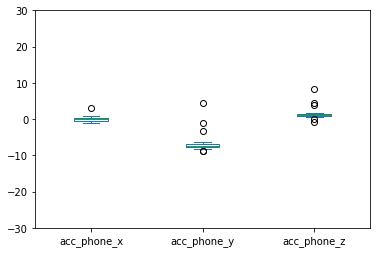

Figure saved to figures/figure_2.png
Figure saved to figures/figure_2.pdf


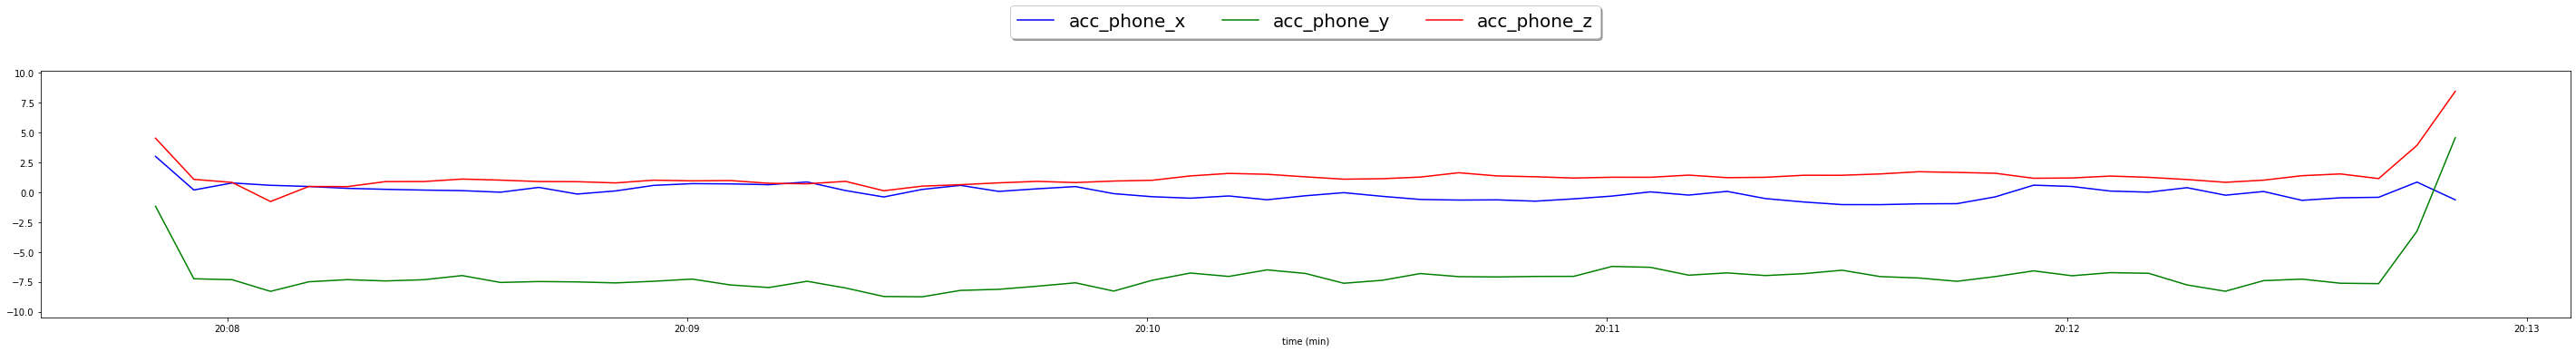

       acc_phone_x  acc_phone_y  acc_phone_z
count       61.000       61.000       61.000
mean        -0.013       -6.973        1.291
std          0.647        1.852        1.162
min         -1.037       -8.745       -0.777
25%         -0.464       -7.582        0.894
50%          0.007       -7.311        1.132
75%          0.382       -6.937        1.365
max          2.999        4.564        8.441
Creating numerical datasets from files in our_datasets/ch2_2_raw using granularity 1000.
Reading data from running.csv
Figure saved to figures/figure_1.png
Figure saved to figures/figure_1.pdf


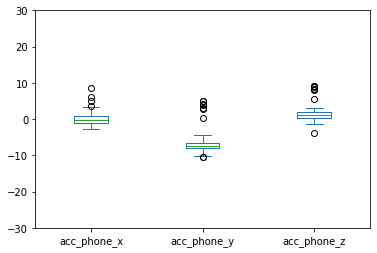

Figure saved to figures/figure_2.png
Figure saved to figures/figure_2.pdf


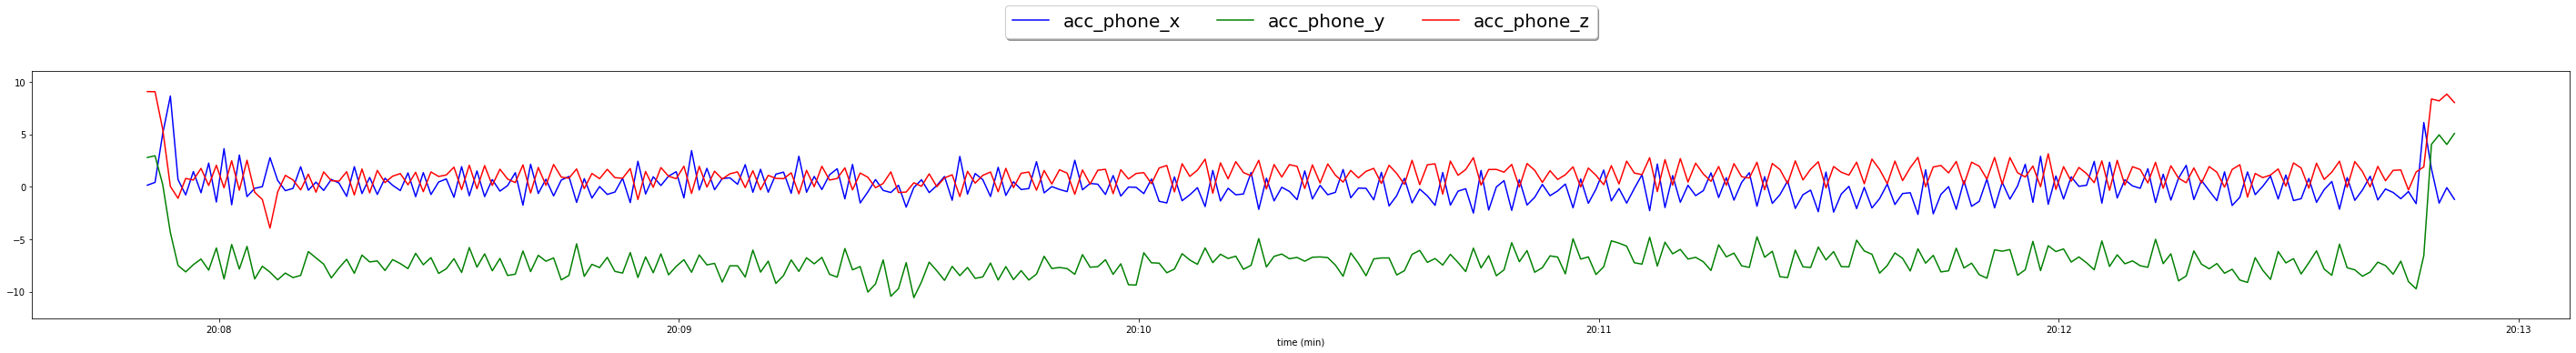

       acc_phone_x  acc_phone_y  acc_phone_z
count      302.000      302.000      302.000
mean        -0.007       -7.088        1.220
std          1.435        1.953        1.472
min         -2.631      -10.565       -3.937
25%         -1.014       -8.080        0.295
50%         -0.172       -7.335        1.264
75%          0.825       -6.565        1.901
max          8.659        5.089        9.084
Creating numerical datasets from files in our_datasets/ch2_2_raw using granularity 500.
Reading data from running.csv
Figure saved to figures/figure_1.png
Figure saved to figures/figure_1.pdf


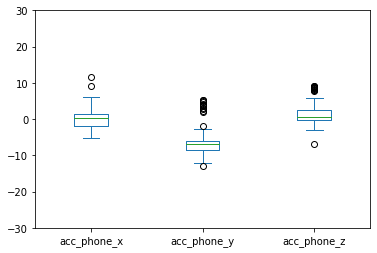

Figure saved to figures/figure_2.png
Figure saved to figures/figure_2.pdf


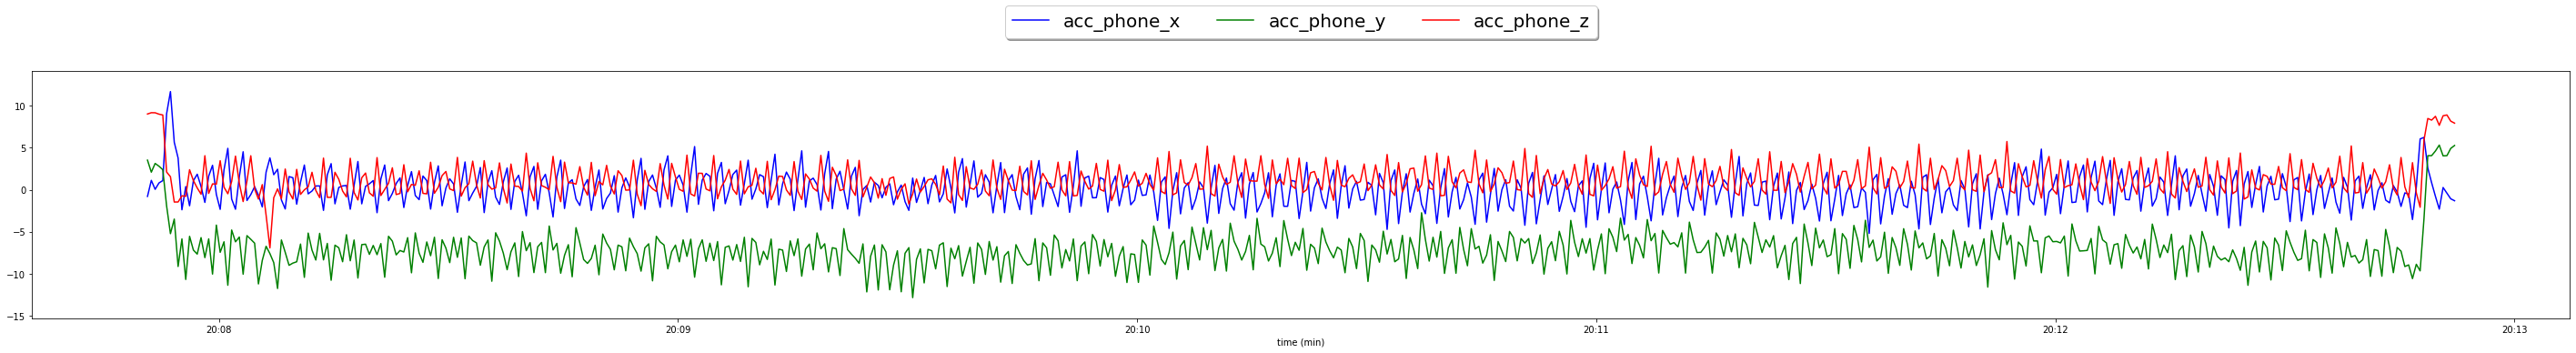

       acc_phone_x  acc_phone_y  acc_phone_z
count      604.000      604.000      604.000
mean        -0.007       -7.088        1.220
std          2.172        2.478        2.008
min         -5.201      -12.838       -6.922
25%         -1.783       -8.566       -0.106
50%          0.332       -6.916        0.598
75%          1.464       -5.929        2.485
max         11.676        5.310        9.160
attribute, fraction missing values, mean, standard deviation, min, max
acc_phone_x & 0.00  /  0.00 & -0.01  /  -0.01 & 0.65  /  1.43 & -1.04  /  -2.63 & 3.00  /  8.66\\
acc_phone_y & 0.00  /  0.00 & -6.97  /  -7.09 & 1.85  /  1.95 & -8.74  /  -10.56 & 4.56  /  5.09\\
acc_phone_z & 0.00  /  0.00 & 1.29  /  1.22 & 1.16  /  1.47 & -0.78  /  -3.94 & 8.44  /  9.08\\
The code has run through successfully!


In [77]:
from Chapter2.CreateDataset import CreateDataset
from util.VisualizeDataset import VisualizeDataset
from util import util
import matplotlib.pyplot as plt
from pathlib import Path
import copy
import os
import sys

%matplotlib inline

%matplotlib inline



DATASET_PATH = Path('./our_datasets/ch2_2_raw/')
RESULT_PATH = Path('./our_datasets/ch2_1_results/')
RESULT_FNAME = 'chapter2_result.csv'

GRANULARITIES = [5000, 1000, 500]
[path.mkdir(exist_ok=True, parents=True) for path in [DATASET_PATH, RESULT_PATH]]

print('Please wait, this will take a while to run!')

datasets = []
for milliseconds_per_instance in GRANULARITIES:
    print(f'Creating numerical datasets from files in {DATASET_PATH} using granularity {milliseconds_per_instance}.')

    # Create an initial dataset object with the base directory for our data and a granularity
    dataset = CreateDataset(DATASET_PATH, milliseconds_per_instance)

    # Add the selected measurements to it.

    # We add the accelerometer data (continuous numerical measurements) of the phone and the smartwatch
    # and aggregate the values per timestep by averaging the values
    dataset.add_numerical_dataset('running.csv', 'timestamps', ['x','y','z'], 'avg', 'acc_phone_')
    

    # We add the labels provided by the users. These are categorical events that might overlap. We add them
    # as binary attributes (i.e. add a one to the attribute representing the specific value for the label if it
    # occurs within an interval).
    # dataset.add_event_dataset('labels.csv', 'label_start', 'label_end', 'label', 'binary')

    # Get the resulting pandas data table
    dataset = dataset.data_table
    dataset = dataset.astype(float)
    # Plot the data
    DataViz = VisualizeDataset()
    # DataViz = VisualizeDataset('./our_datasets/ch2_1/')
    
    # Boxplot
    DataViz.plot_dataset_boxplot(dataset, ['acc_phone_x','acc_phone_y','acc_phone_z'])
    # plt.boxplot(dataset["acc_phone_x"])

    # Plot all data
    DataViz.plot_dataset(dataset, ['acc_'], ["like"], ["line"])

    # And print a summary of the dataset.
    util.print_statistics(dataset)
    datasets.append(copy.deepcopy(dataset))

    # If needed, we could save the various versions of the dataset we create in the loop with logical filenames:



# Make a table like the one shown in the book, comparing the two datasets produced.
util.print_latex_table_statistics_two_datasets(datasets[0], datasets[1])

# Finally, store the last dataset we generated (250 ms).
# dataset.to_csv(RESULT_PATH / RESULT_FNAME)

# Lastly, print a statement to know the code went through

print('The code has run through successfully!')